In [1]:
import scanpy as sc
import pandas as pd
import mudata as mu
import numpy as np

In [2]:
sc.set_figure_params(dpi_save=300, dpi=100, frameon=False)

In [3]:
russell_sc = mu.read_h5mu("/vol/storage/data/simulations/russel_ref.h5mu")
russell_sc

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 2535 × 90052
  var:	'highly_variable'
  2 modalities
    rna:	2535 x 36601
      obs:	'barcodes', 'NAME_x', 'X', 'Y', 'cell_type', 'NAME_y', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'cluster'
      var:	'ens', 'gene', 'type', 'chromosome', 'start', 'end', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cell_type_colors', 'hvg', 'log1p'
      obsm:	'X_umap', 'spatial'
      layers:	'log_norm'
    atac:	2535 x 53451
      obs:	'barcodes', 'NAME_x', 'X', 'Y', 'cell_type', 'NAME_y', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'cluster'
      var:	'features', 'highly_variable', 'highly_accessible'
      uns:	'cell_type_colors', 'log1p'
      obsm:	'X_umap', 'spatial'
      layers:	'log_norm', 'tfidf_normalized'

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


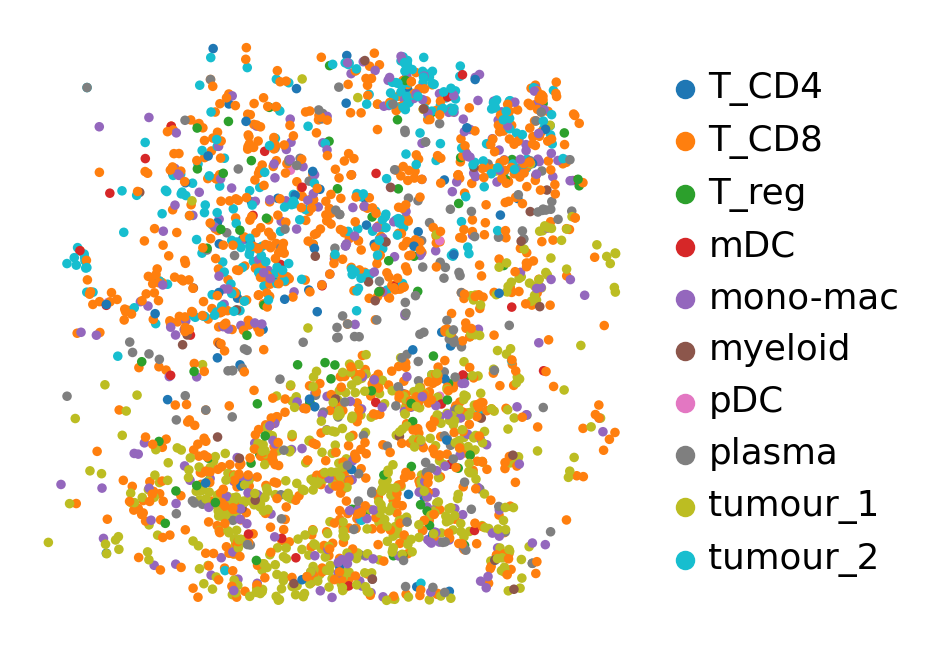

In [26]:
sc.pl.embedding(russell_sc.mod["atac"], basis = "spatial", color = "cell_type",  title='', save=True)

In [5]:
russell = mu.read_h5mu("/vol/storage/data/simulations/russell_250.h5mu")
russell

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 360 × 90052
  var:	'highly_variable'
  2 modalities
    rna:	360 x 36601
      obs:	'cell_count', 'leiden_pca'
      var:	'ens', 'gene', 'type', 'chromosome', 'start', 'end', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'leiden', 'log1p', 'neighbors', 'pca', 'proportion_names'
      obsm:	'X_pca', 'proportions', 'spatial'
      varm:	'PCs'
      layers:	'log_norm'
      obsp:	'connectivities', 'distances'
    atac:	360 x 53451
      obs:	'cell_count', 'leiden_pca', 'leiden_lsi'
      var:	'features', 'highly_variable', 'highly_accessible'
      uns:	'leiden', 'log1p', 'lsi', 'neighbors', 'pca', 'proportion_names'
      obsm:	'X_lsi', 'X_pca', 'proportions', 'spatial'
      varm:	'LSI', 'PCs'
      layers:	'log_norm', 'tfidf_normalized'
      obsp:	'connectivities', 'distances'

In [6]:
russell.mod["atac"]

AnnData object with n_obs × n_vars = 360 × 53451
    obs: 'cell_count', 'leiden_pca', 'leiden_lsi'
    var: 'features', 'highly_variable', 'highly_accessible'
    uns: 'leiden', 'log1p', 'lsi', 'neighbors', 'pca', 'proportion_names'
    obsm: 'X_lsi', 'X_pca', 'proportions', 'spatial'
    varm: 'LSI', 'PCs'
    layers: 'log_norm', 'tfidf_normalized'
    obsp: 'connectivities', 'distances'

In [6]:
# Caculate the most probable cluster assignment
max_prob_cluster = np.argmax(russell.mod["atac"].obsm["proportions"], axis=1)
max_prob_cluster


array([8, 1, 7, 1, 9, 9, 8, 1, 4, 8, 8, 1, 1, 9, 9, 1, 4, 7, 8, 1, 1, 4,
       8, 1, 7, 1, 1, 9, 3, 1, 8, 1, 1, 4, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1,
       9, 4, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 9, 1, 1, 7, 1, 8, 1,
       1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 1, 1, 1, 0, 1, 1, 1, 8,
       8, 1, 5, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 8, 1,
       1, 2, 1, 7, 1, 1, 9, 9, 1, 1, 1, 1, 1, 1, 8, 8, 8, 1, 8, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 1, 8, 1, 1, 8, 8, 2, 8, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 8, 8, 1, 1, 1, 8, 8, 8, 1, 2, 7, 1, 1, 1,
       1, 1, 4, 1, 7, 9, 8, 8, 4, 1, 1, 1, 1, 1, 8, 1, 7, 9, 9, 1, 1, 9,
       1, 1, 1, 9, 8, 1, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 9, 5, 1, 1, 1,
       9, 1, 1, 7, 8, 8, 8, 1, 1, 8, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7, 9, 1,
       9, 8, 4, 8, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 0, 1, 7, 9, 9, 1, 8, 8,
       1, 8, 8, 1, 7, 1, 1, 7, 9, 1, 1, 1, 1, 9, 4, 9, 4, 1, 4, 8, 1, 1,
       4, 1, 8, 8, 1, 1, 1, 1, 0, 1, 1, 1, 9, 4, 8,

In [7]:
# Get the column names
cluster_id = russell.mod["atac"].uns["proportion_names"]
russell.mod["atac"].obs["ground truth"] = cluster_id[max_prob_cluster]

In [15]:
russell_sc.mod["atac"].obs.cell_type.cat.categories

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')

In [ ]:
russell.mod["atac"].obs['ground truth'] = pd.Categorical(russell.mod["atac"].obs['ground truth'], categories=russell_sc.mod["atac"].obs.cell_type.cat.categories)

In [18]:
russell.mod["atac"].uns["ground truth_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


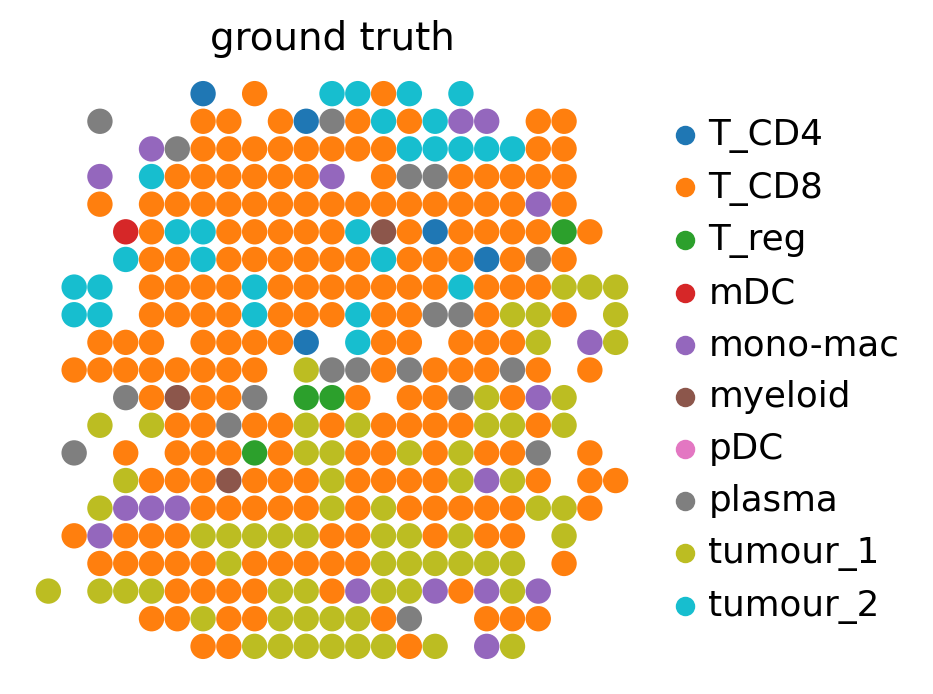

In [27]:
sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "ground truth", save="gt")

### Cell2Location

In [29]:
russell_atac_ha = "/vol/storage/data/deconvolution_results/cell2location/atac/russell_250_highly_accessible/means_cell_abundance_w_sf.csv"
russell_atac_hv = "/vol/storage/data/deconvolution_results/cell2location/atac/russell_250_highly_variable/means_cell_abundance_w_sf.csv"
russell_rna = "/vol/storage/data/deconvolution_results/cell2location/rna/russell_250_highly_variable/means_cell_abundance_w_sf.csv"
results = [russell_atac_ha, russell_rna, russell_atac_hv]

In [32]:
russell_atac_ha.split("/")#[-2]

['',
 'vol',
 'storage',
 'data',
 'deconvolution_results',
 'cell2location',
 'atac',
 'russell_250_highly_accessible',
 'means_cell_abundance_w_sf.csv']

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


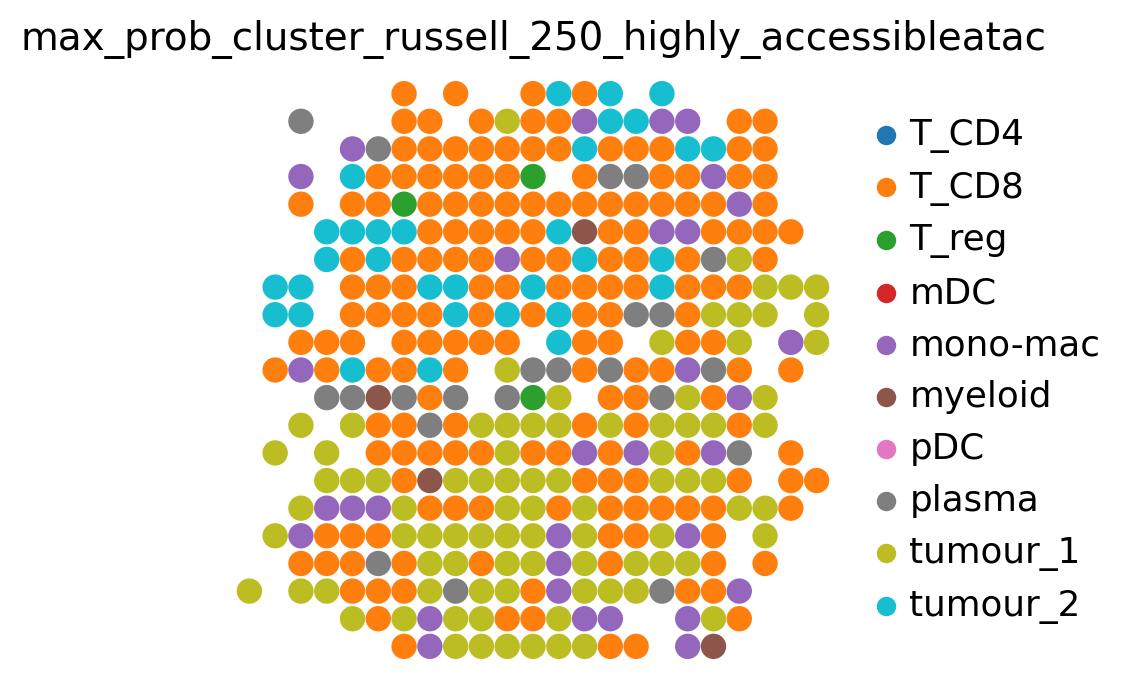

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


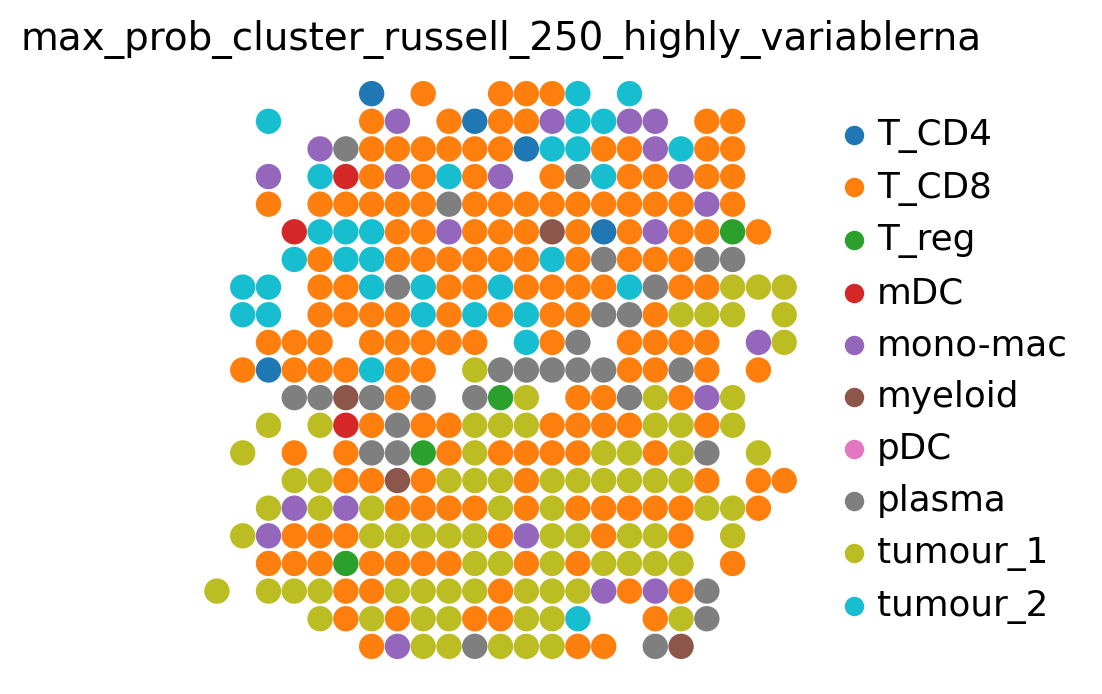

/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


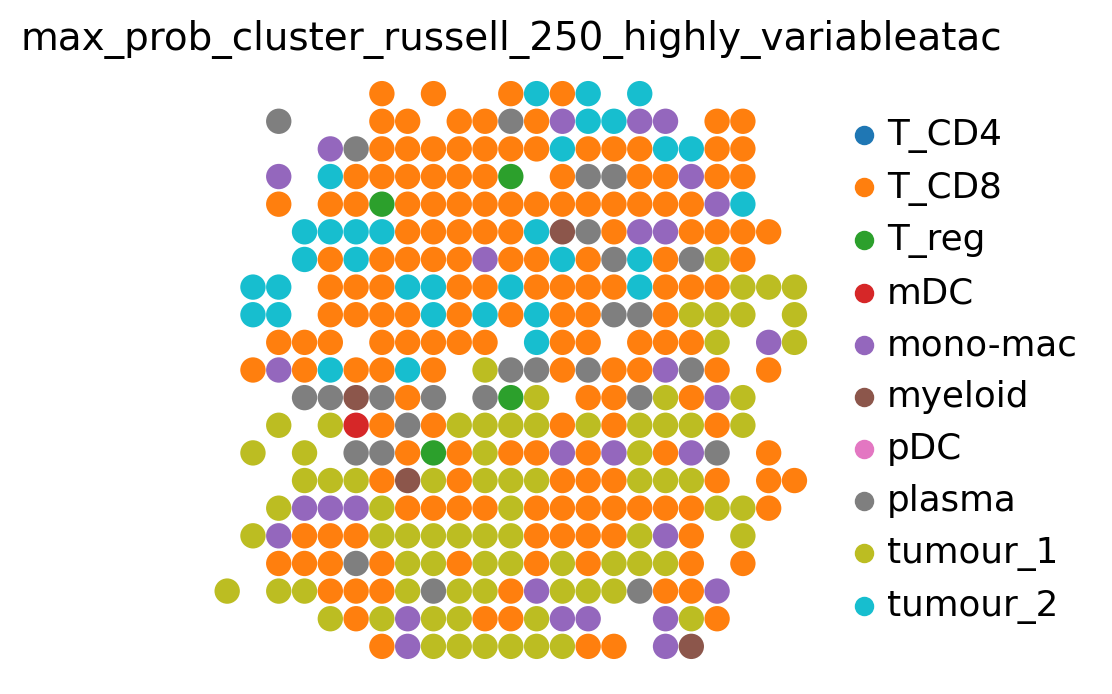

In [33]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    dt.columns = dt.columns.str.removeprefix("meanscell_abundance_w_sf_")
    curr = result.split("/")[-2]
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = pd.Categorical(russell.mod["atac"].obs['max_prob_cluster_'+ curr + mod]
                                                                               , categories=russell_sc.mod["atac"].obs.cell_type.cat.categories)
    russell.mod["atac"].uns['max_prob_cluster_' + curr + mod + "_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "max_prob_cluster_"+ curr + mod, save= result.split("/")[-4]+curr+mod)
    


### RCTD

In [34]:
russell_atac_ha = "/vol/storage/data/deconvolution_results/rctd/atac/russell_250_highly_accessible/estimated_proportions.csv"
russell_atac_hv = "/vol/storage/data/deconvolution_results/rctd/atac/russell_250_highly_variable/estimated_proportions.csv"
russell_rna = "/vol/storage/data/deconvolution_results/rctd/rna/russell_250_highly_variable/estimated_proportions.csv"
results = [russell_atac_ha, russell_rna, russell_atac_hv]

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


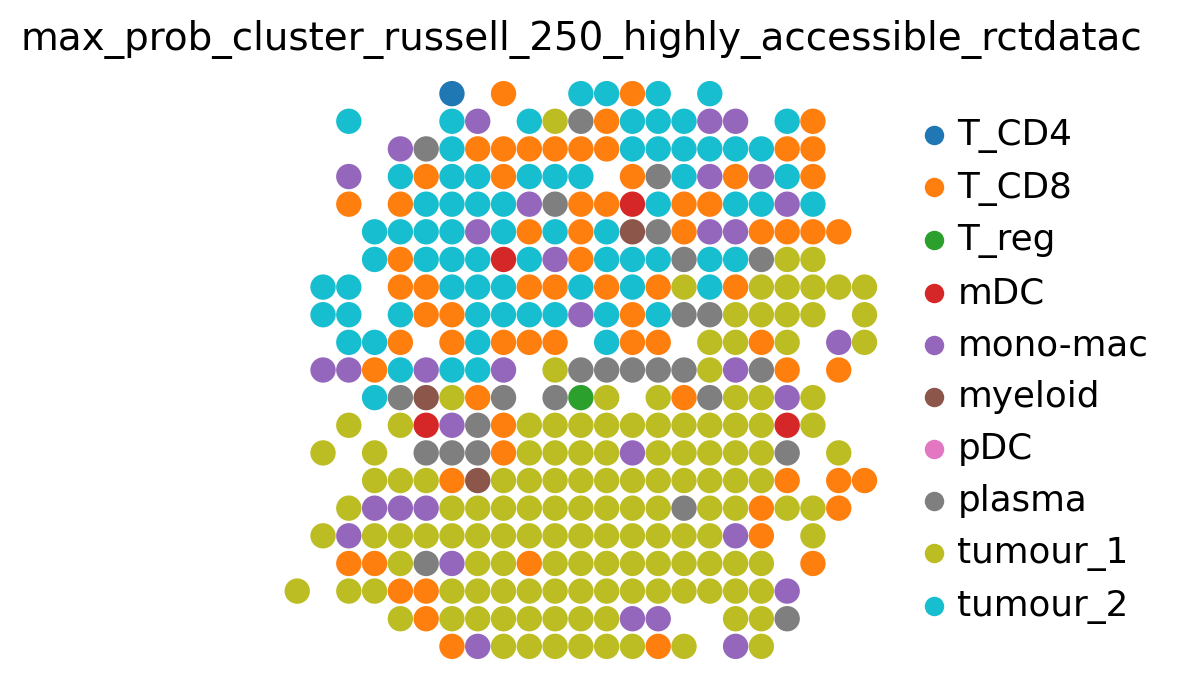

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


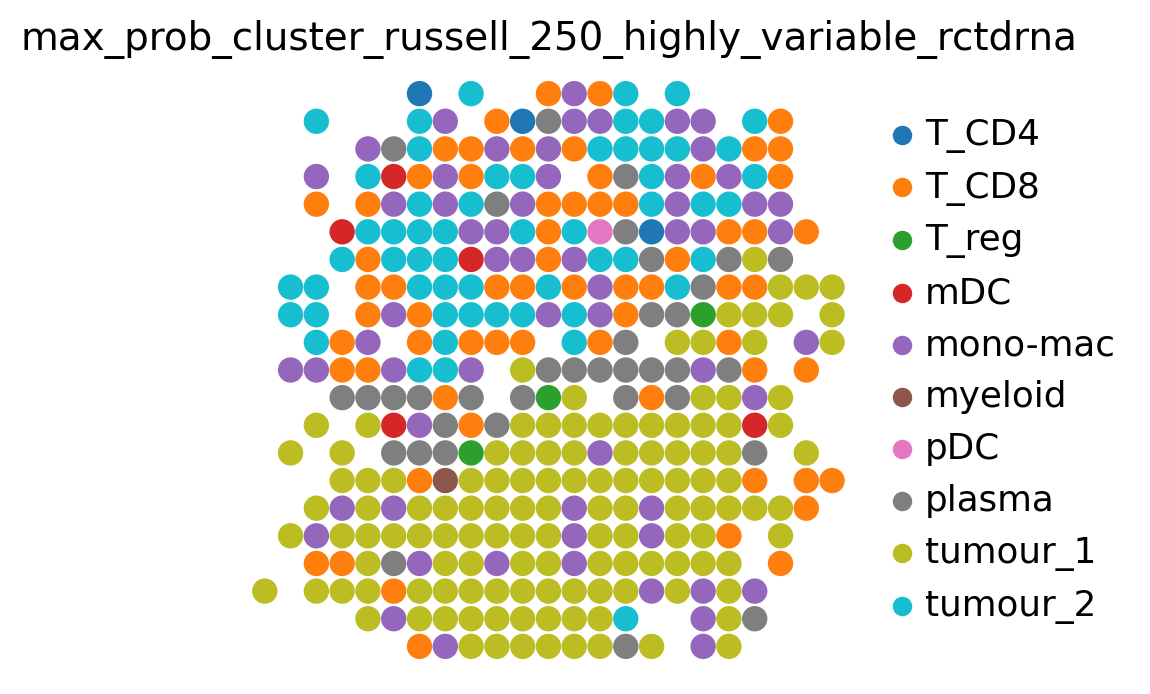

Index(['T_CD4', 'T_CD8', 'T_reg', 'mDC', 'mono-mac', 'myeloid', 'pDC',
       'plasma', 'tumour_1', 'tumour_2'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


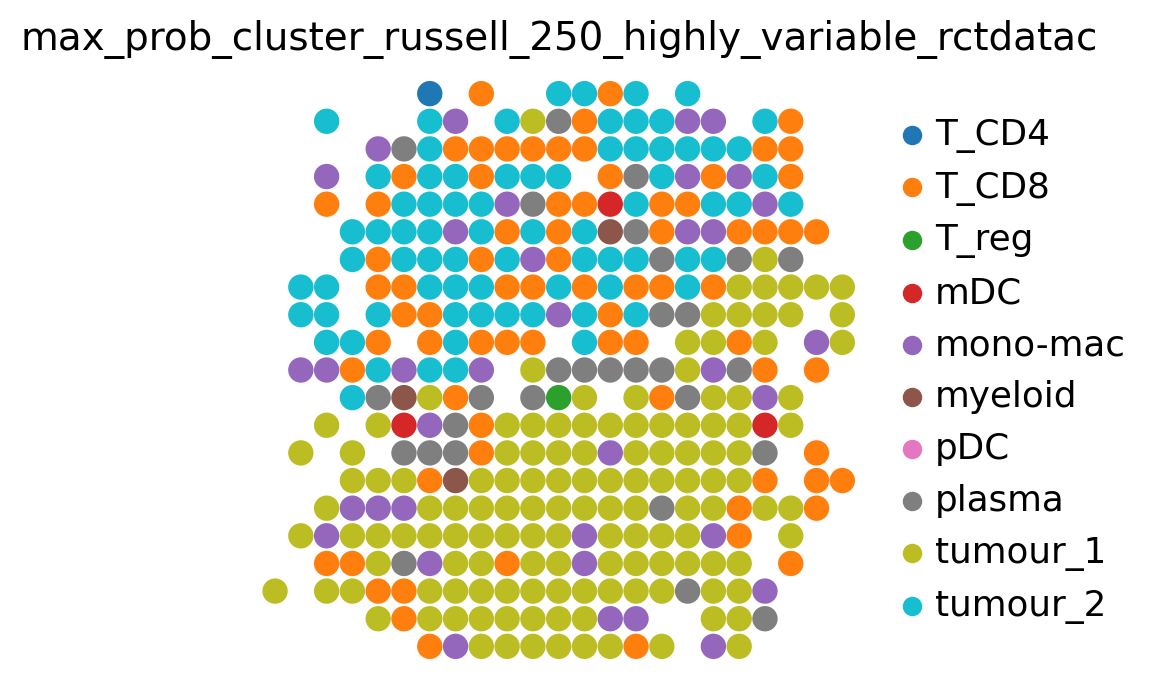

In [35]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    print(dt.columns)
    curr = result.split("/")[-2] + "_rctd"
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs["max_prob_cluster_" + curr + mod] = pd.Categorical(
        russell.mod["atac"].obs["max_prob_cluster_" + curr + mod],
        categories=russell_sc.mod["atac"].obs.cell_type.cat.categories,
    )
    russell.mod["atac"].uns['max_prob_cluster_' + curr + mod + "_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "max_prob_cluster_"+ curr + mod,save= result.split("/")[-4]+curr+mod)

### Tangram

In [36]:
russell_atac_ha = "/vol/storage/data/deconvolution_results/tangram/atac/russell_250_highly_accessible/tangram_ct_pred.csv"
russell_atac_hv = "/vol/storage/data/deconvolution_results/tangram/atac/russell_250_highly_variable/tangram_ct_pred.csv"
russell_rna = "/vol/storage/data/deconvolution_results/tangram/rna/russell_250_highly_variable/tangram_ct_pred.csv"
results = [russell_atac_ha, russell_rna, russell_atac_hv]

Index(['T_reg', 'mono-mac', 'T_CD8', 'tumour_2', 'tumour_1', 'T_CD4', 'plasma',
       'pDC', 'mDC', 'myeloid'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


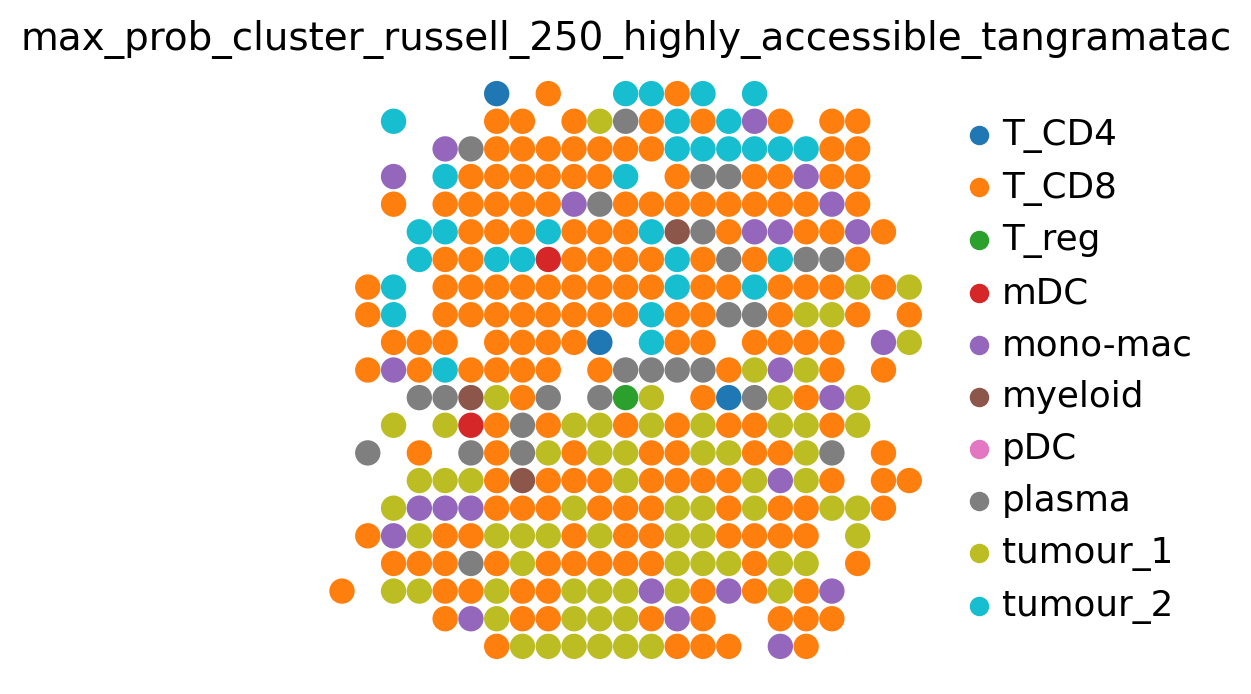

Index(['T_reg', 'mono-mac', 'T_CD8', 'tumour_2', 'tumour_1', 'T_CD4', 'plasma',
       'pDC', 'mDC', 'myeloid'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


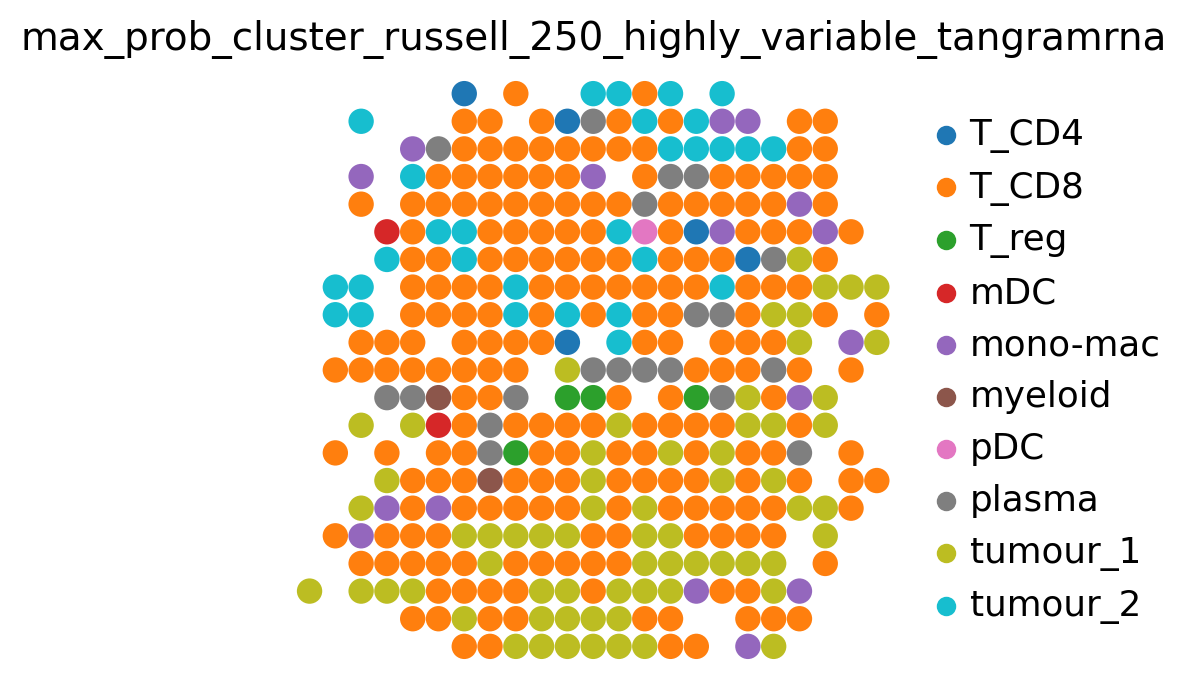

Index(['T_reg', 'mono-mac', 'T_CD8', 'tumour_2', 'tumour_1', 'T_CD4', 'plasma',
       'pDC', 'mDC', 'myeloid'],
      dtype='object')


/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/storage/miniconda3/envs/atac2space/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


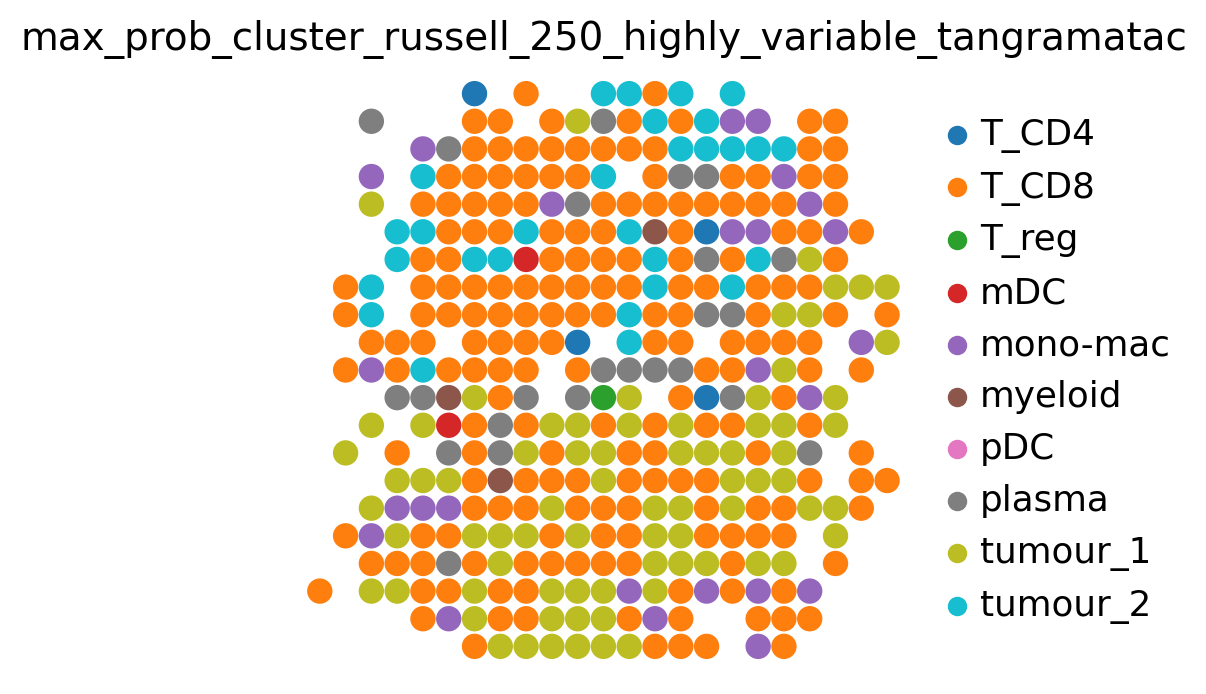

In [37]:
for result in results:
    dt = pd.read_csv(result, index_col=0)
    print(dt.columns)
    curr = result.split("/")[-2] + "_tangram"
    mod = result.split("/")[-3]
    dt.index = russell.obs.index
    russell.obsm[curr] = dt
    # Caculate the most probable cluster assignment
    max_prob_cluster = np.argmax(russell.obsm[curr], axis=1)
    # Get the column names
    cluster_id = dt.columns.to_numpy()
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = cluster_id[max_prob_cluster]
    russell.mod["atac"].obs['max_prob_cluster_' + curr + mod] = pd.Categorical(
        russell.mod["atac"].obs["max_prob_cluster_" + curr + mod],
        categories=russell_sc.mod["atac"].obs.cell_type.cat.categories,
    )
    russell.mod["atac"].uns['max_prob_cluster_' + curr + mod + "_colors"] = russell_sc.mod["atac"].uns["cell_type_colors"].copy()
    sc.pl.embedding(russell.mod["atac"], basis = "spatial", color = "max_prob_cluster_"+ curr + mod,save= result.split("/")[-4]+curr+mod)
    
